/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.0% of the points cannot be plac

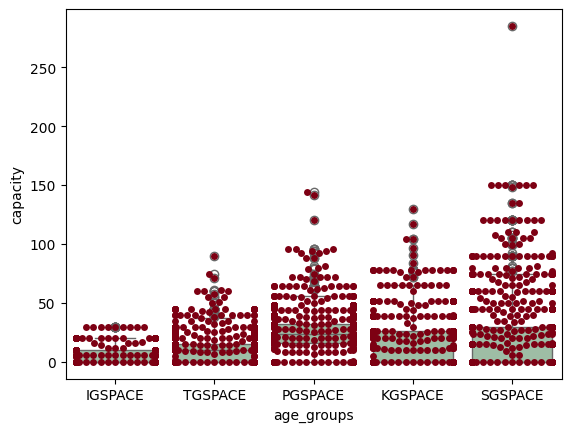

In [18]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Load the dataset
df = pd.read_excel("INF2178_A2_data.xlsx")

# Reshape the dataframe suitable for statsmodels package
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])

# Replace column names
df_melt.columns = ['index', 'age_groups', 'capacity']

# Generate a boxplot to see the data distribution by age groups
ax = sns.boxplot(x='age_groups', y='capacity', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="age_groups", y="capacity", data=df_melt, color='#7d0013')
plt.show()

In [19]:
# Ordinary Least Squares (OLS) model
model = ols('capacity ~ C(age_groups)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='capacity', anova_model='capacity ~ C(age_groups)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(age_groups),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


In [20]:
# Post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='capacity', xfac_var='age_groups', anova_model='capacity ~ C(age_groups)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.412308,9.995029,12.974001,0.001000
1,IGSPACE,PGSPACE,20.362183,18.070822,22.653543,34.292619,0.001000
2,IGSPACE,KGSPACE,10.361242,8.069881,12.652602,17.449707,0.001000
3,IGSPACE,SGSPACE,17.764817,15.473456,20.056177,29.918310,0.001000
4,TGSPACE,PGSPACE,12.658514,10.367153,14.949874,21.318618,0.001000
5,TGSPACE,KGSPACE,2.657573,0.366213,4.948933,4.475706,0.013527
6,TGSPACE,SGSPACE,10.061148,7.769787,12.352508,16.944309,0.001000
7,PGSPACE,KGSPACE,10.000941,7.709580,12.292301,16.842912,0.001000
8,PGSPACE,SGSPACE,2.597366,0.306006,4.888726,4.374309,0.017028
9,KGSPACE,SGSPACE,7.403575,5.112214,9.694935,12.468603,0.001000


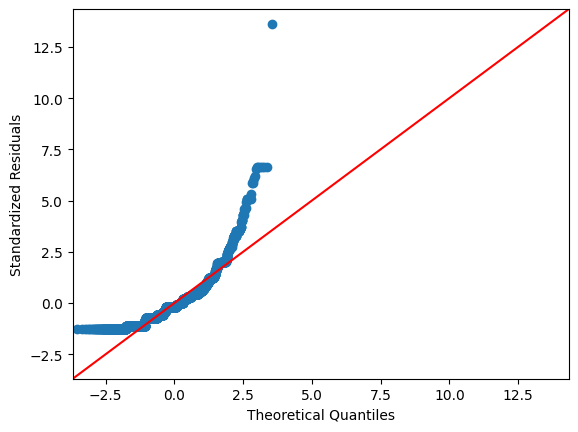

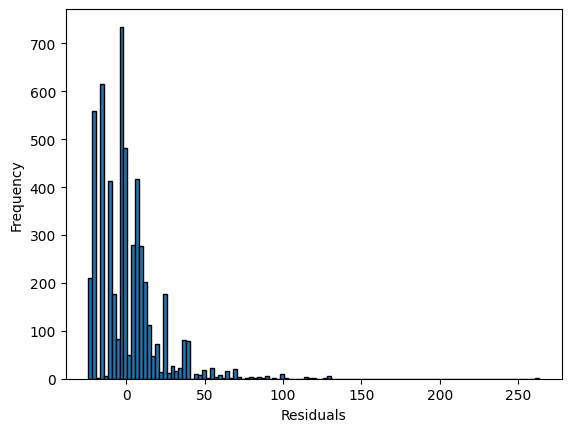

In [21]:
# Checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assumption 1: Check if residuals are normally distributed
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram of residuals
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [22]:
# Shapiro-Wilk test for normality
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8427014350891113 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
# Bartlett's test for homogeneity of variances
w, pvalue = stats.bartlett(df['IGSPACE'], df['TGSPACE'], df['PGSPACE'], df['KGSPACE'], df['SGSPACE'])
print(w, pvalue)

res = stat()
res.bartlett(df=df_melt, res_var='capacity', xfac_var='age_groups')
res.bartlett_summary

2461.7361089753927 0.0


,Parameter,Value
0,Test statistics (T),2461.7361
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [24]:
# Levene's test for homogeneity of variances
res.levene(df=df_melt, res_var='capacity', xfac_var='age_groups')
res.levene_summary

,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [25]:
# Two Way Anova
df_melt = pd.melt(df, id_vars=['AUSPICE', 'ward'], value_vars=['TOTSPACE'])
df_melt.columns = ['AUSPICE', 'ward', 'SpaceType', 'value']
df_melt.head()

,AUSPICE,ward,SpaceType,value
0,Non Profit Agency,3,TOTSPACE,164
1,Non Profit Agency,8,TOTSPACE,83
2,Non Profit Agency,25,TOTSPACE,102
3,Non Profit Agency,10,TOTSPACE,65
4,Non Profit Agency,20,TOTSPACE,26


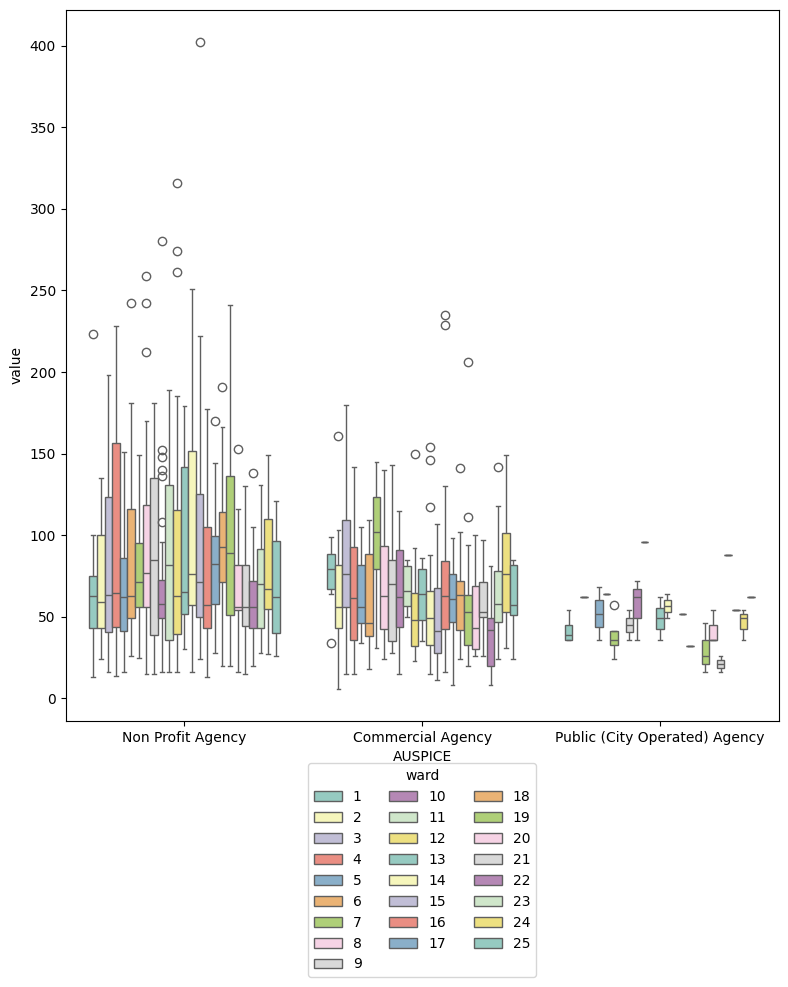

In [27]:
# Boxplot to visualize the data distribution
plt.figure(figsize=(8, 10))
ax = sns.boxplot(x="AUSPICE", y="value", hue="ward", data=df_melt, palette="Set3")

# Place the legend at the bottom of the plot
ax.legend(title='ward', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# Two-way ANOVA model
model = ols('value ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq     df          F        PR(>F)
C(AUSPICE)          9.914924e+04    2.0  22.623942  2.463860e-10
C(ward)             9.083235e+04   24.0   1.727182  2.989186e-02
C(AUSPICE):C(ward)  8.288887e+04   48.0   0.788068  8.317984e-01
Residual            2.178098e+06  994.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 18
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 42
  warnings.warn('covariance of constraints does not have full '


In [29]:
# Two Way ANOVA summary
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)')
print(res.anova_summary)


                       df        sum_sq       mean_sq          F        PR(>F)
C(AUSPICE)            2.0  9.914924e+04  49574.619836  22.623942  2.463860e-10
C(ward)              24.0  9.083235e+04   3784.681369   1.727182  2.989186e-02
C(AUSPICE):C(ward)   48.0  8.288887e+04   1726.851486   0.788068  8.317984e-01
Residual            994.0  2.178098e+06   2191.245882        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 18
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 42
  warnings.warn('covariance of constraints does not have full '


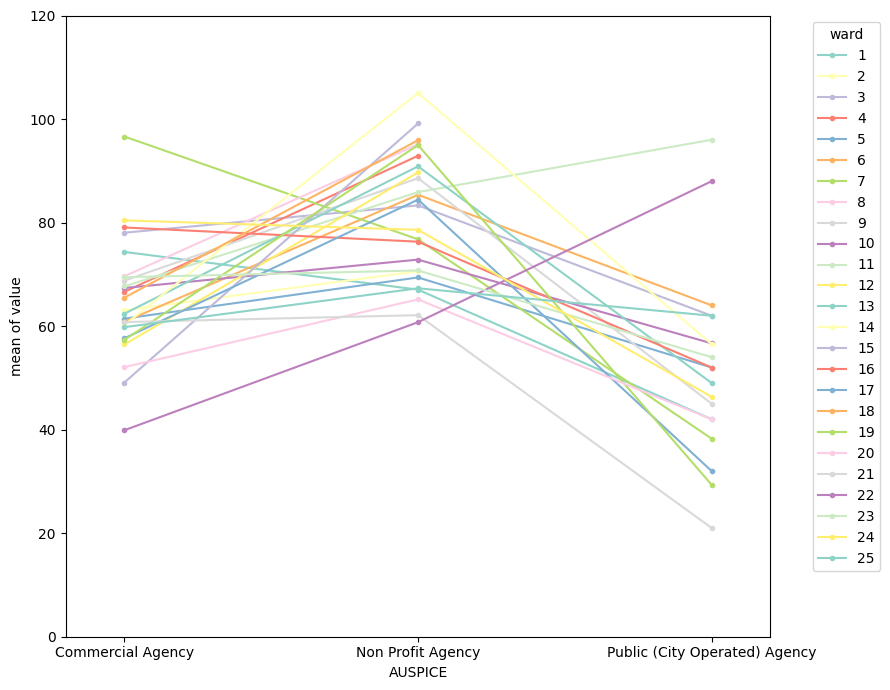

In [30]:
# Interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Count the number of unique levels in the 'ward' variable
unique_wards = df_melt['ward'].nunique()

colors = sns.color_palette("Set3", unique_wards)

# Create the interaction plot
fig, ax = plt.subplots(figsize=(9, 7))

interaction_plot(x=df_melt['AUSPICE'], trace=df_melt['ward'], response=df_melt['value'],
                 colors=colors, ax=ax)

# Adjust the y-axis range
ax.set_ylim([0, 120])

# Move the legend to a better location
ax.legend(title='ward', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Tukey's HSD post hoc test
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='ward', anova_model='value ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)')
print(res.tukey_summary)

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

     group1  group2       Diff      Lower      Upper   q-value   p-value
0         3       8   5.522116 -26.724989  37.769221  0.888434  0.900000
1         3      25  14.631430 -24.103118  53.365979  1.959742  0.900000
2         3      10   9.980756 -23.553542  43.515053  1.544133  0.900000
3         3      20  21.316159 -13.116472  55.748790  3.211806  0.817150
4         3      24   3.783341 -32.000621  39.567302  0.548527  0.900000
..      ...     ...        ...        ...        ...       ...       ...
295      23      13  12.985714 -32.139109  58.110538  1.493004  0.900000
296      23      16   7.066667 -33.410016  47.543349  0.905775  0.900000
297      22      13  26.144689 -16.392349  68.681726  3.188797  0.828001
298      22      16  20.225641 -17.344450  57.795732  2.792998  0.900000
299      13      16   5.919048 -35.415893  47.253988  0.742925  0.900000

[300 rows x 7 columns]


In [32]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='AUSPICE', anova_model='value ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)')
print(res.tukey_summary)

              group1                         group2       Diff      Lower  \
0  Non Profit Agency              Commercial Agency  17.119417   9.717772   
1  Non Profit Agency  Public (City Operated) Agency  34.334610  16.258688   
2  Commercial Agency  Public (City Operated) Agency  17.215193  -1.417469   

       Upper   q-value   p-value  
0  24.521062  7.677832  0.001000  
1  52.410532  6.305355  0.001000  
2  35.847854  3.067008  0.077211  


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

In [33]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var=['AUSPICE', 'ward'], anova_model='value ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)')
print(res.tukey_summary.head())

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

                   group1                   group2       Diff      Lower  \
0  (Non Profit Agency, 3)   (Non Profit Agency, 8)  11.794118 -35.790530   
1  (Non Profit Agency, 3)  (Non Profit Agency, 25)  16.019182 -36.950257   
2  (Non Profit Agency, 3)  (Non Profit Agency, 10)  10.479779 -37.842659   
3  (Non Profit Agency, 3)  (Non Profit Agency, 20)  18.163529 -33.526629   
4  (Non Profit Agency, 3)  (Non Profit Agency, 24)   4.723529 -50.564835   

       Upper   q-value  p-value  
0  59.378765  1.469127      0.9  
1  68.988620  1.792568      0.9  
2  58.802217  1.285476      0.9  
3  69.853688  2.082827      0.9  
4  60.011894  0.506400      0.9  
